In [1]:
import numpy as np                 # for numerical python
import pandas as pd                # for data analysis
import seaborn as sns              # for visualization
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

[Boston Housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [2]:
df = pd.read_csv('housing.data', delim_whitespace = True, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df.columns = col_name

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Performance Evaluation of Regression Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    # choosong a linear model

In [7]:
X = df.iloc[:, :-1].values

In [8]:
y = df['MEDV'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
model = LinearRegression()    # design a model

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_train_pred = model.predict(X_train)

In [13]:
y_test_pred = model.predict(X_test)

# Method 1: Residual Analysis

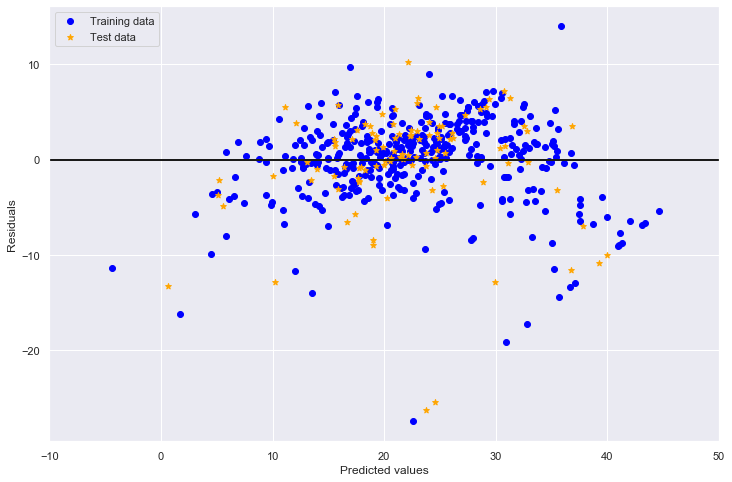

In [14]:
plt.figure(figsize=(12,8));

plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'orange', marker = '*', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'k')
plt.xlim([-10, 50])

plt.show();

# Method 2: Mean Squared Error (MSE)

In [15]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [16]:
mean_squared_error(y_test, y_test_pred)

33.448979997676474

# Method 3: Coefficient of Determination, $R^2$

In [17]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.7730135569264234

In [18]:
r2_score(y_test, y_test_pred)

0.5892223849182514